# Compressing Data via Dimensionality Reduction

An alternative approach to feature selection for dimensionality reduction is **feature extraction**. *Data compression* is an important topic in machine learning, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

## Unsupervised dimensionality reduction via principal component analysis

Similar to feature selection, we can use different feature extraction techniques to reduce the number of features in a dataset. The difference between feature selection and feature extraction is that while we maintain the original features when we used feature selection algorithms, such as sequential backward selection, we use feature extraction to transform or project the data onto a new feature space. In the context of dimensionality reduction, feature extraction can be understood as an approach to data compression with the goal of maintaining most of the relevant information. 

Popular applications of PCA include exploratory data analyses and de-noising of signals in stock market trading, and the analysis of genome data and gene expression levels in the field of bioinformatics.

### Principal component analysis

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other, as illustrated in the following figure:

<img src="images/pca_orthogonal.jpeg" alt="PCA orthogonal axes" title="PCA orthogonal axes" height="300" width="450">

If we use PCA for dimensionality reduction, we construct a $d \times k$–dimensional transformation matrix $W$ that allows us to map a sample vector $x$ onto a new $k$–dimensional feature subspace that has fewer dimensions than the original d–dimensional feature space:

\begin{equation*}
\begin{matrix}
x = \left[ x_1, x_2, \dots{}, x_d \right], & x \in \mathbb{R}^d \\
\downarrow xW, & W \in \mathbb{R}^{d \times k} \\
z = \left[ z_1, z_2, \dots, z_k \right], & z \in \mathbb{R}^k
\end{matrix}
\end{equation*}

As a result of transforming the original d-dimensional data onto this new k-dimensional subspace (typically k << d), the first principal component will have the largest possible variance, and all consequent principal components will have the largest variance given the constraint that these components are uncorrelated (orthogonal) to the other principal components—even if the input features are correlated, the resulting principal components will be mutually orthogonal (uncorrelated). Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.

 Let's summarize the approach in a few simple steps:
 
 1. Standardize the $d$-dimensional dataset.
 2. Construct the covariance matrix.
 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
 5. Select $k$ eigenvectors which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace ($k \leq d$). 
 6. Construct a projection matrix $W$ from the "top" $k$ eigenvectors.
 7. Transform the $d$-dimensional input dataset $X$ using the projection matrix $W$ to obtain the new $k$-dimensional feature subspace.

### Extracting the principal components step by step

In [1]:
# load the wine dataset
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)   # 
df_wine.info()
# online
# df = pd.read_csv('./data_sets/wine.data', header=None)    # offline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [3]:
# separate training and test data (70, 30)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

After completing the mandatory preprocessing by executing the preceding code, let's advance to the second step: constructing the covariance matrix. The symmetric $d \times d$-dimensional covariance matrix, where $d$ is the number of dimensions in the dataset, stores the pairwise covariances between the different features. For example, the covariance between two features and on the population level can be calculated via the following equation:

\begin{equation*}
\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n \left( x_j^{(i)} - \mu_j \right) \left( x_k^{(i)} - \mu_k \right)
\end{equation*}

Here, $\mu_j$ and $\mu_k$ are the sample means of features $j$ and $k$, respectively. Note that the sample means are zero if we standardized the dataset. A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions. For example, the covariance matrix of three features can then be written as follows (note that $Sigma$ stands for the Greek uppercase letter sigma, which is not to be confused with the *sum* symbol):

\begin{equation*}
\Sigma = \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_3^2
\end{bmatrix}
\end{equation*}

The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude. In the case of the Wine dataset, we would obtain 13 eigenvectors and eigenvalues from the $13 \times 13$-dimensional covariance matrix.

For the third step, let's obtain the eigenpairs of the covariance matrix. As we remember from our introductory linear algebra classes, an eigenvector v satisfies the following condition:

\begin{equation*}
\Sigma{}v = \lambda{}v
\end{equation*}

Here, $\lambda$ is a scalar: the eigenvalue.

In [4]:
import numpy as np


cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues {}'.format(eigen_vals))


Eigenvalues [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### Total and explained variance

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). The eigenvalues define the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude; we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues. But before we collect those $k$ most informative eigenvectors, let us plot the **variance explained** ratios of the eigenvalues. The variance explained ratio of an eigenvalue $\lambda_j$ is simply the fraction of an eigenvalue $\lambda_j$ and the total sum of the eigenvalues:

\begin{equation*}
\frac{\lambda_j}{\sum_{j=1}^d \lambda_j}
\end{equation*}



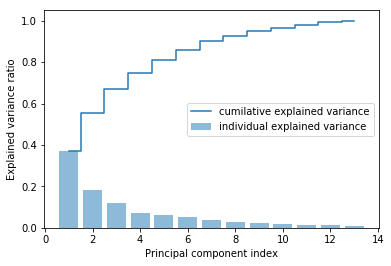

In [6]:
# with cumsum we can calculate the cumulative sum of expained variances

import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumilative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

The explained variance plot reminds us of the feature importance values that we computed via random forests, we should remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored. Whereas a random forest uses the class membership information to compute the node impurities, variance measures the spread of values along a feature axis.

## Feature transformation

Now let's proceed with the last three steps to transform the Wine dataset onto the new principal component axes. The remaining steps we are going to tackle in this section are the following ones:

* Select $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace ($k \leq d$). 
* Construct a projection matrix $W$ from the "top" k eigenvectors.
* Transform the d-dimensional input dataset $X$ using the projection matrix $W$ to obtain the new $k$-dimensional feature subspace.

Or, in less technical terms, we will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto the lower-dimensional subspace.

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# eigen_pairs

# sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203513,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977367,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578422,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114,

Next, we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60 percent of the variance in this dataset. In practice, the number of principal components has to be determined by a trade-off between computational efficiency and the performance of the classifier.

In [12]:
# we created a 13 x 2-dimensional projection matrix W from top two eigenvectors.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Using the projection matrix, we can now transform a sample $x$ (represented as a $1 \times 13$-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining $x^{\prime}$, now a two-dimensional sample vector consisting of two new features:

\begin{equation*}
x^{\prime} = xW
\end{equation*}

In [13]:
print(X_train_std[0])
print(X_train_std[0].dot(w))

[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
[2.38299011 0.45458499]


Similarly, we can transform the entire $124 \times 13$-dimensional training dataset onto the two principal components by calculating the matrix dot product:

In [10]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

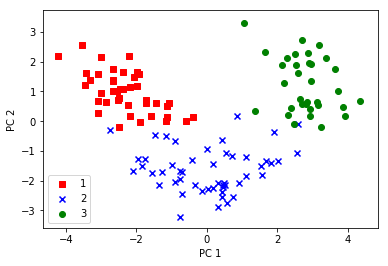

In [11]:
# les's visualize the transformed Wine training set.
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

As we can see in the resulting plot, the data is more spread along the x-axis—the first principal component—than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created in the previous subsection. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.

**We have to keep in mind that PCA is an unsupervised technique that doesn't use any class label information.**

### Principal component analysis in scikit-learn

Now, we will discuss how to use the PCA class implemented in scikit-learn. 

/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raziel/.virtualenvs/PythonMachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


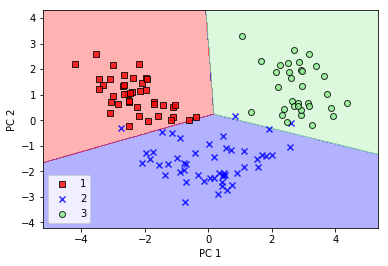

In [14]:
# using PCA from sckit learn
from plot_regions import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

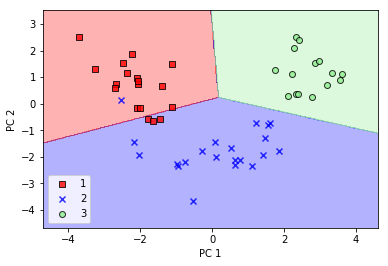

In [15]:
# test the transformed test dataset
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

If we are interested in the explained variance ratios of the different principal components, we can simply initialize the PCA class with the n_components parameter set to None, so all principal components are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_ attribute:

In [20]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

Note that we set n_components=None when we initialized the PCA class so that it will return all principal components in a sorted order instead of performing a dimensionality reduction.